###STROKE ANALYSIS

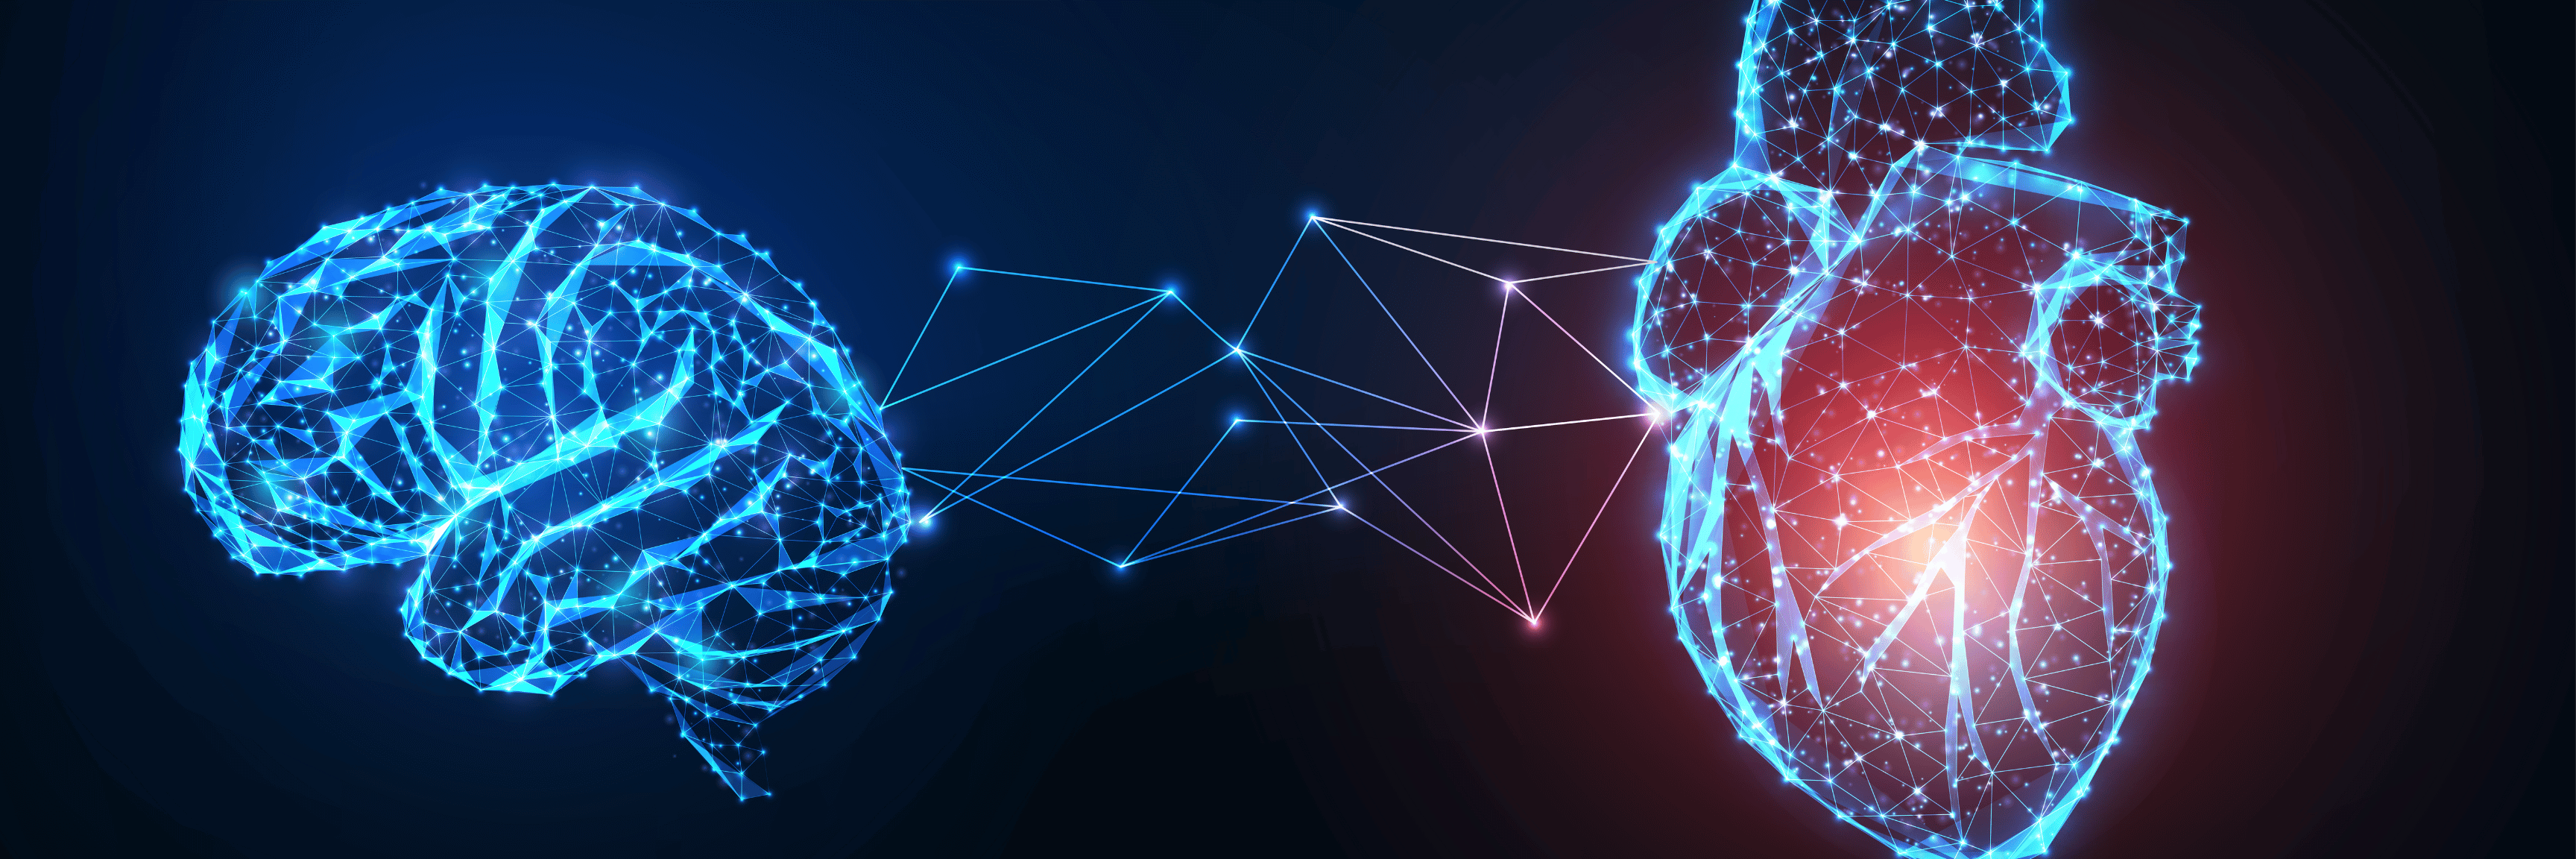

###**1. Introduction**
Stroke is one of the deadliest diseases worldwide, often striking suddenly without warning. It ranks as the second leading cause of death, just behind cardiovascular diseases. In recent years, the number of stroke cases has been rising rapidly due to changes in diet, lifestyle, and an aging population.

What makes stroke particularly dangerous is its silent progression. Symptoms are often vague or go unnoticed, leading many people to believe they are healthy and underestimate their risk. As a result, treatment and preventive measures are often neglected until it is too late.

A comprehensive analysis of stroke expression can provide valuable insights into the underlying causes of the disease. Identifying these factors is essential for improving early detection and prevention strategies, ultimately reducing the impact of stroke on individuals and society.





###**2. Project objectives**

*   Identify the key factors that contribute to stroke occurrence.
*   Examine the relationships between these factors to understand their impact on stroke risk.

###**3. Dataset**

This dataset was originally sourced from Kaggle and is titled "Stroke Prediction Data". It contains various attributes that provide insights into potential stroke risk factors.

 **Attribute Information:**
- **id**: Unique identifier for each patient.
- **gender**:  Patient’s gender: "Male", "Female", or "Other".
- **age**: Age of the patient.
- **hypertension**: 0 if the patient does not have hypertension, 1 if the patient has hypertension.
- **heart_disease**: 0 if the patient does not have heart disease, 1 if the patient has heart disease.
- **ever_married**: "No" or "Yes"
- **work_type**: Employment type: "Children", "Govt_job", "Never_worked", "Private", or "Self-employed".
- **Residence_type**: Living environment: "Rural" or "Urban".
- **avg_glucose_level**: Average glucose level in the blood.
- **bmi**: Body Mass Index (BMI) of the patient.
- **smoking_status**:  Smoking history: "Formerly smoked", "Never smoked" ,"Smokes" or "Unknown"

###**4. Data Exploration**

In [173]:
#Import the library
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
#Read data
df= pd.read_csv("/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv")

####4.1 Data Overview


> This section provides an overview of the dataset to better understand its contents and basic structure.









In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [103]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [104]:
#Display the first five columns
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [105]:
#Display the last five columns
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [106]:
df.size

61320

In [107]:
df.shape

(5110, 12)


> This dataset contain of 5,110 rows and 12 columns, including 3 decimal, 4 integer, and 5 categorical (text) columns




####**4.2 Cleaning data**

In [108]:
df.duplicated().sum()

0

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB




> It can be seen that bmi column has some missing values. Let's take a closer look


In [110]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [111]:
df.isnull().sum()/len(df)

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,0.039335


> There are 201 null values in bmi, account for 3.9% in the dataset.

In [112]:
null_value= df.isnull().sum()

In [113]:
null_value.index

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

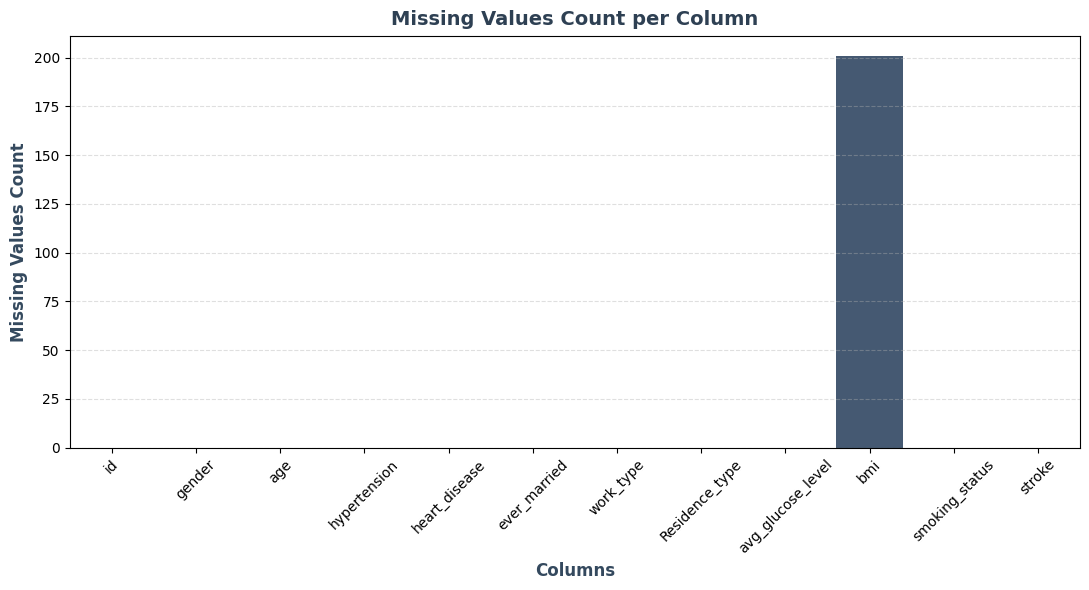

In [171]:
plt.figure(figsize=(11, 6))
sns.barplot(x=null_value.index, y=null_value.values,color= "#3E5879")
plt.xticks(rotation=45)
plt.title("Missing Values Count per Column", fontsize=14, fontweight='bold',pad=8,color='#2E4053')
plt.xlabel("Columns", fontsize=12,fontweight='bold', color='#34495E')
plt.ylabel("Missing Values Count", fontsize=12,fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()






> Usually, there are several ways to handle missing values in a dataset. One approach is to drop rows with missing values, but this is not recommended as it can lead to data loss.

> A better approach is to use the **fillna()** method to fill in the missing values.Using the median is often preferred because it is less sensitive to extreme values (outliers) compared to the mean. The median represents the middle value of a dataset, ensuring that the filled values do not skew the overall distribution, making it a more reliable choice for handling missing numerical data.















> Since people with the same gender and age tend to have similar BMI values, we fill missing BMI values based on the median BMI within each gender-age group.




In [115]:
bmi_group= df.groupby(['gender', 'age'])['bmi']

df['bmi'] = bmi_group.transform(lambda x: x.fillna(x.median()))


###**5. Data Analysis**

####**5.1 Numerical data**
> After processing and cleaning the data, we will begin by reviewing the numerical data.


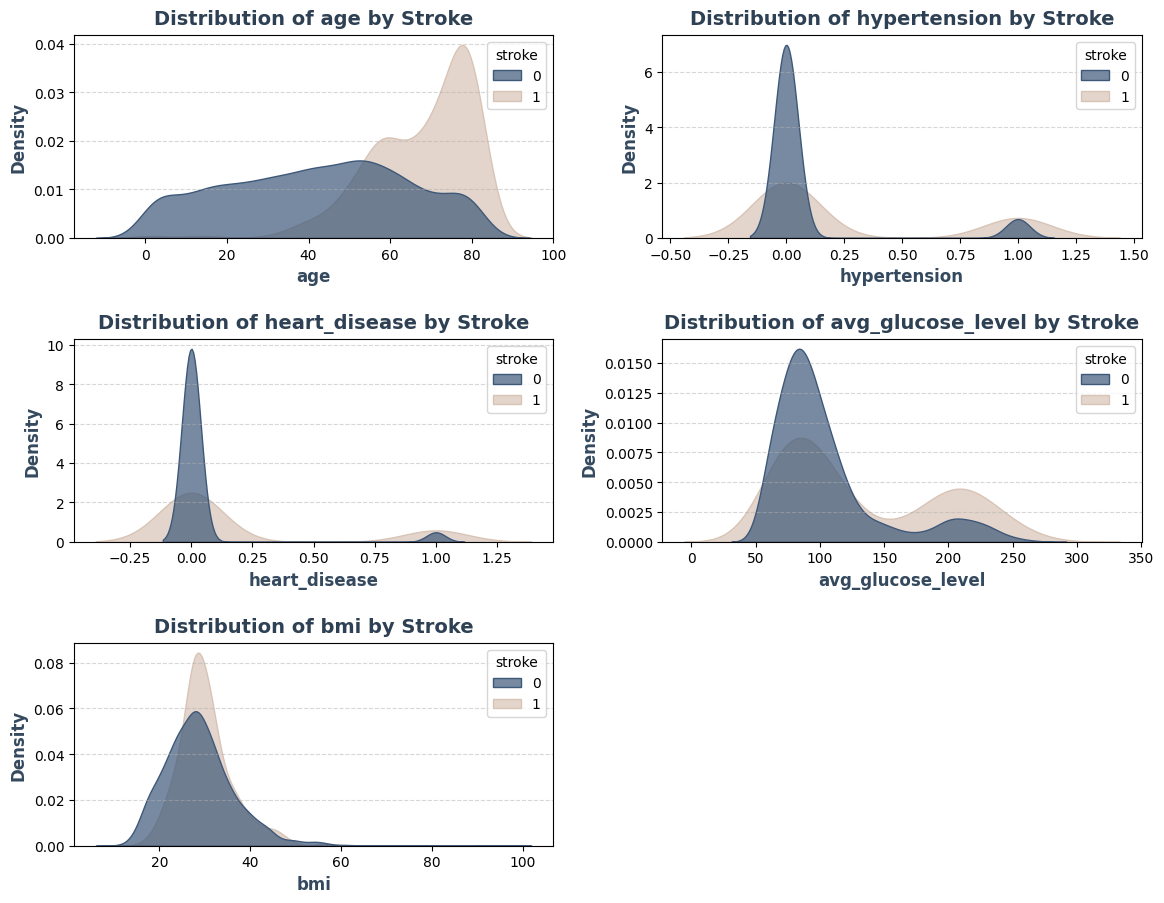

In [116]:
# Select numerical variables (excluding 'id' and 'stroke')
num_vars = df.drop(columns=['id', 'stroke']).select_dtypes(include=['float64', 'int64']).columns.tolist()
num_count = len(num_vars)

plt.figure(figsize=(12,num_count*3))

for i, var in enumerate(num_vars, 1):
    plt.subplot(num_count, 2, i)
    sns.kdeplot(
        data=df, x=var, hue='stroke',
        fill=True, alpha=0.7, common_norm=False, palette=['#3E5879', '#D8C4B6'])
    plt.title(f'Distribution of {var} by Stroke', fontsize=14, fontweight='bold',pad=8,color='#2E4053')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xlabel(var, fontsize=12,fontweight='bold', color='#34495E')
    plt.ylabel('Density', fontsize=12,fontweight='bold', color='#34495E')

plt.tight_layout(pad=2)
plt.show()



> bmi and age have a strong impact on stroke risk, with specific ranges being more closely associated with stroke occurrence.



> avg_glucose level, heart_disease, and hypertension: These factors are more evenly distributed, showing that they can occur at any stage without a clear threshold for stroke risk.




To gain a deeper understanding, we will now analyze the patterns among stroke patients to identify common characteristics. This will allow us to draw a final conclusion about stroke.

In [117]:
df.stroke.value_counts()

,count
stroke,
0,4861
1,249




> There are total 249 people have stroke in this data



In [118]:
#From df, take the data of stroke patient:
stroke_data = df[df["stroke"] == 1]

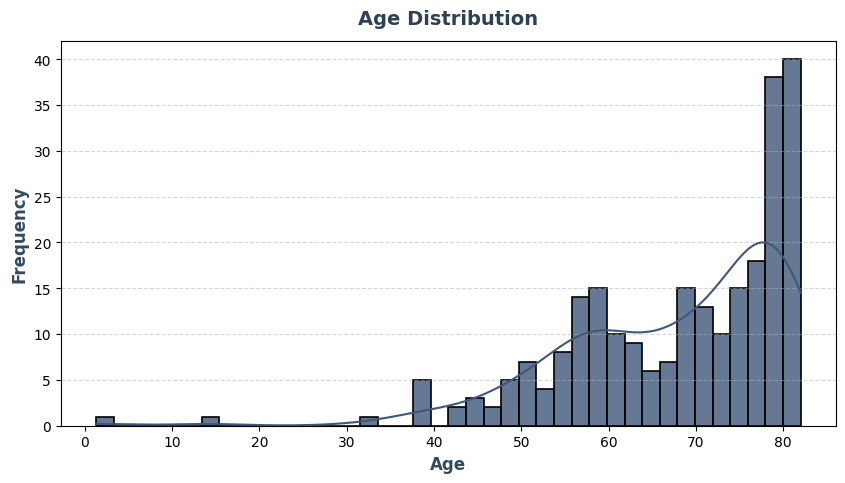

In [119]:
plt.figure(figsize=(10, 5))

sns.histplot(
    data=stroke_data, x='age', bins=40, kde=True,
    color='#3E5879', edgecolor='black', alpha=0.8, linewidth=1.2)
plt.title('Age Distribution', fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.xlabel('Age', fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



*    The histogram shows a left-skewed pattern,indicating that stroke cases are more concentrated among older individuals.
*    The number of stroke cases gradually rises after the age of 40, showing a clear trend of higher risk as age increases.
*    There is a significant increase in stroke cases beyond 70, suggesting that older adults are more affected.
*    Although less common, strokes still occur at younger ages, indicating that other factors beyond aging may contribute to the risk.






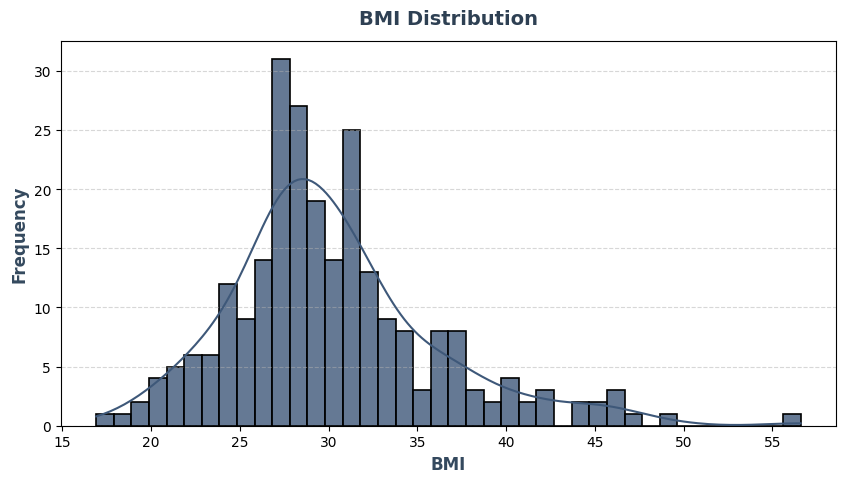

In [120]:
plt.figure(figsize=(10, 5))

sns.histplot(
    data=stroke_data, x='bmi', bins=40, kde=True,
    color='#3E5879', edgecolor='black', alpha=0.8, linewidth=1.2)
plt.title('BMI Distribution', fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.xlabel('BMI', fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



> It is evident that strokes occur mainly when BMI falls within the range of 25 to 35. To better understand the significance of BMI and what these numerical values represent, we will categorize BMI into groups based on the  [NSW Health](https://www.health.nsw.gov.au/heal/Pages/bmi.aspx#:~:text=Health%20professionals%20commonly%20measure%20Body,BMI%20of%2025%20to%2029.9) classification


In [121]:
#Finding min and max to define the range of data
stroke_data.bmi.min()

16.9

In [122]:
stroke_data.bmi.max()

56.6

In [123]:
def categorize_BMI(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal Weight'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

In [124]:
stroke_data['bmi_category'] = stroke_data['bmi'].apply(categorize_BMI)

<ipython-input-124-2869fbb5a477>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data['bmi_category'] = stroke_data['bmi'].apply(categorize_BMI)


In [125]:
BMI_cat = stroke_data.bmi_category.value_counts()

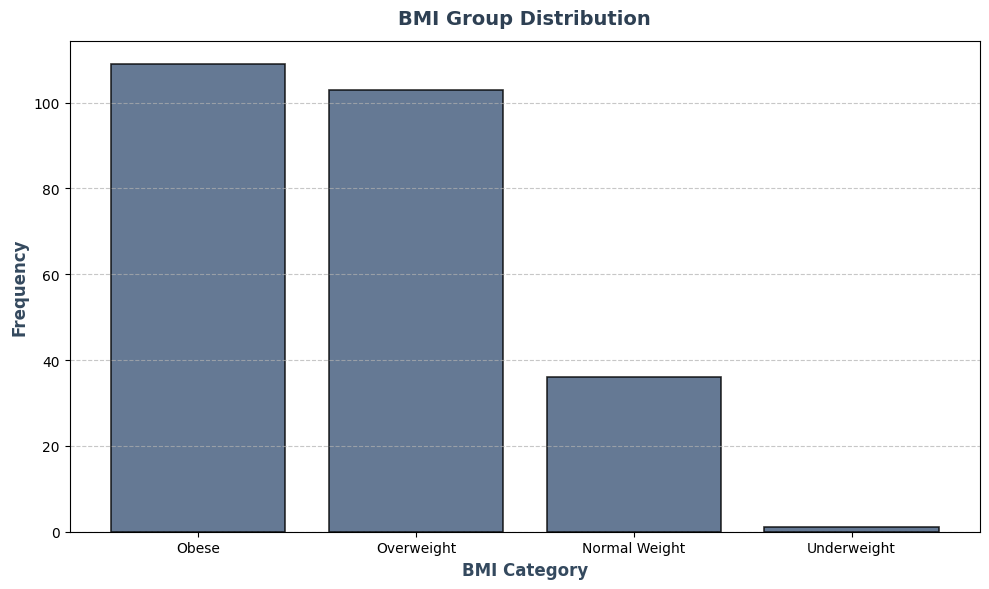

In [126]:
plt.figure(figsize = (10,6))
plt.bar (BMI_cat.index, BMI_cat,color="#3E5879", edgecolor='black', alpha=0.8, linewidth=1.2)
plt.title("BMI Group Distribution",fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.xlabel('BMI Category',fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



> The bar graph shows that people who are **Overweight or Obese** have a much higher chance of having a stroke compared to others. This might be because extra weight can sometimes lead to other health issues, making the body weaker. People carrying excess weight may also not get enough exercise, which can affect circulation and reduce the flow of blood to the brain, increasing the risk of stroke.



In [127]:
Hipertension_value = stroke_data.hypertension.value_counts()

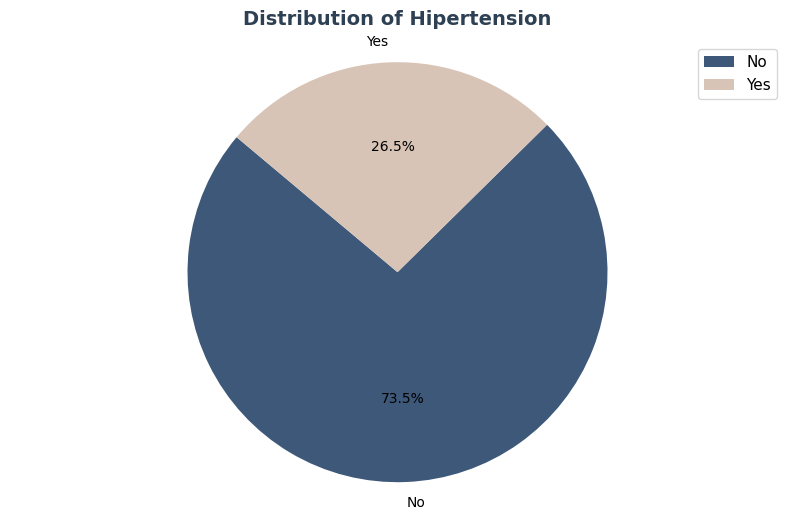

In [128]:
plt.figure(figsize =(10,6))
plt.pie(Hipertension_value, labels = Hipertension_value.index.map({0: "No", 1: "Yes"}),autopct='%1.1f%%',colors=['#3E5879', '#D8C4B6'],startangle=140)
plt.title("Distribution of Hipertension", fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.legend(["No","Yes"], fontsize=11)
plt.axis('equal')
plt.show()



> Surprisingly, hypertension (high blood pressure) doesn't seem to have a major impact on the stroke cases. Out of the total 249 people who had a stroke, only 26.5% were diagnosed with high blood pressure.


In [129]:
Heart_disease=stroke_data.heart_disease.value_counts()

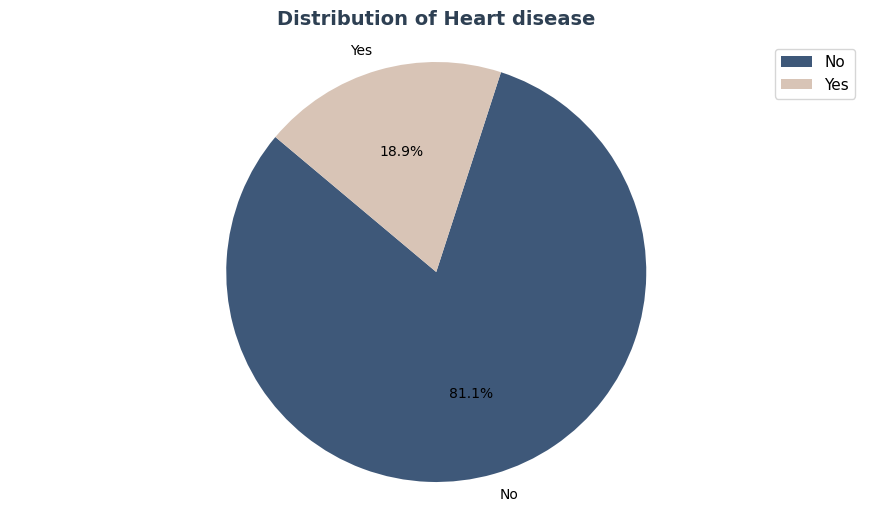

In [130]:
plt.figure(figsize=(11,6))
plt.pie(Heart_disease, labels=Heart_disease.index.map({0: "No", 1: "Yes"}), autopct='%1.1f%%',colors=['#3E5879', '#D8C4B6'],startangle=140)
plt.title("Distribution of Heart disease",fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.legend(["No", "Yes"], fontsize=11)
plt.axis('equal')
plt.show()



> Similar to hypertension, heart disease doesn't seem to have a strong impact on stroke. Only 18.9% of people who had a stroke were diagnosed with heart disease.



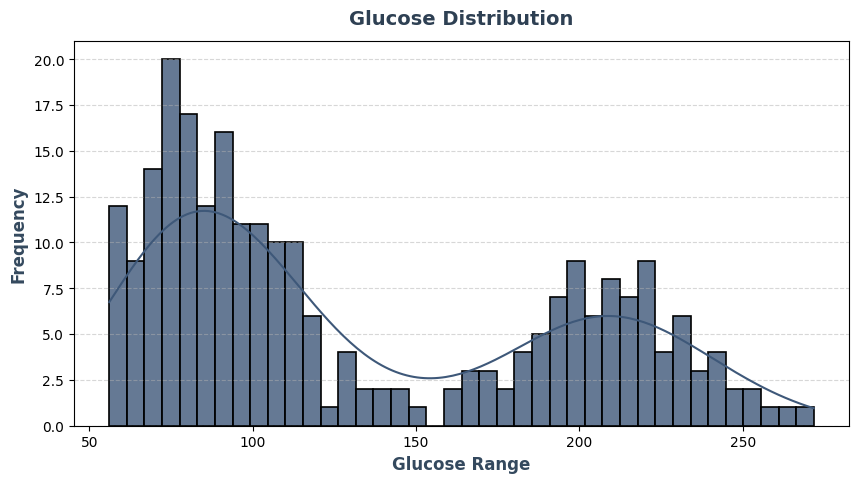

In [131]:
plt.figure(figsize=(10, 5))

sns.histplot(
    data=stroke_data, x='avg_glucose_level', bins=40, kde=True,
    color='#3E5879', edgecolor='black', alpha=0.8, linewidth=1.2)
plt.title('Glucose Distribution', fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.xlabel('Glucose Range', fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



> Glucose levels tend to fluctuate, and individuals are more likely to have a stroke when their average glucose falls between 50 to 100, or around 200 to 240. However, it's hard to spot clear patterns just by looking at the data. Similar to BMI, grouping the glucose levels according to medical classifications will help provide a clearer understanding



In [132]:
stroke_data.avg_glucose_level.min()


56.11

In [133]:
stroke_data.avg_glucose_level.max()


271.74

In [134]:
def glucose_level_group (avg_glucose_level):
  if 56.11 <= avg_glucose_level <70:
    return "Very low"
  elif 70 <= avg_glucose_level < 140:
    return "Normal"
  elif 140 <= avg_glucose_level < 180:
    return "Moderate"
  elif 180<= avg_glucose_level < 250:
    return "High"
  else:
      return "Very high"

In [135]:
stroke_data["avg_glucose_level_group"] = stroke_data["avg_glucose_level"].apply(glucose_level_group)

<ipython-input-135-6cb5625a413c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data["avg_glucose_level_group"] = stroke_data["avg_glucose_level"].apply(glucose_level_group)


In [136]:
glucose_group = stroke_data.avg_glucose_level_group.value_counts()

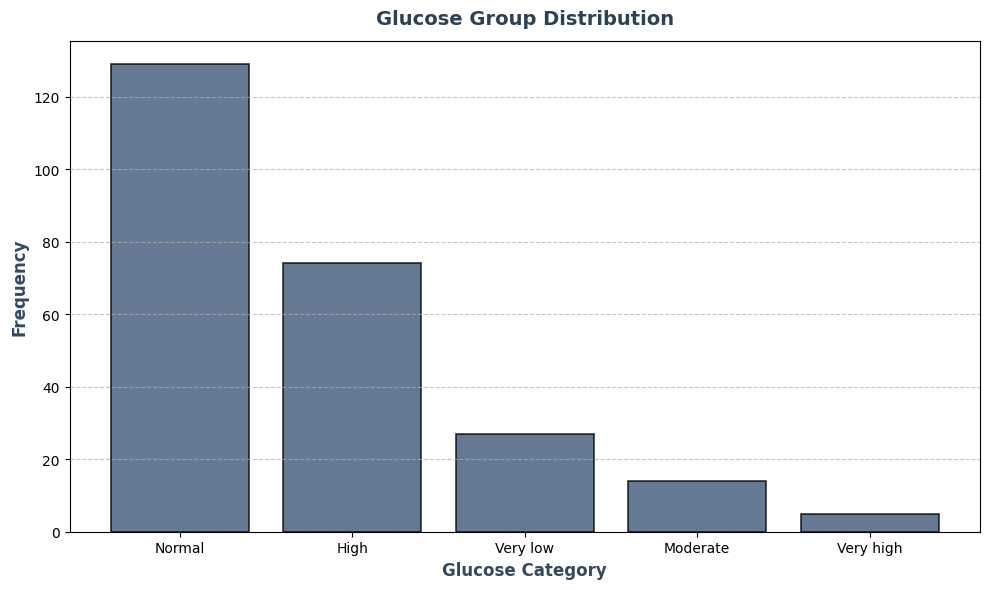

In [137]:
plt.figure(figsize = (10,6))
plt.bar (glucose_group.index,glucose_group,color="#3E5879", edgecolor='black', alpha=0.8, linewidth=1.2)
plt.title("Glucose Group Distribution",fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.xlabel('Glucose Category',fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



> Even though people with high glucose levels have a higher chance of having a stroke, those with normal glucose levels actually have an even higher likelihood of experiencing a stroke. This shows that glucose levels, while important, may not be the key factor influencing stroke risk in this case.





####**5.2. Correlation Matrix**

After analyzing individual patterns, it's important to identify relationships between different variables.It’s a key to see how different factors are connected . A correlation matrix helps to pinpoint which variables are most influential or interrelated, guiding us in making more informed decisions about which factors to focus on. It can also reveal unexpected or surprising patterns that may not be immediately apparent.

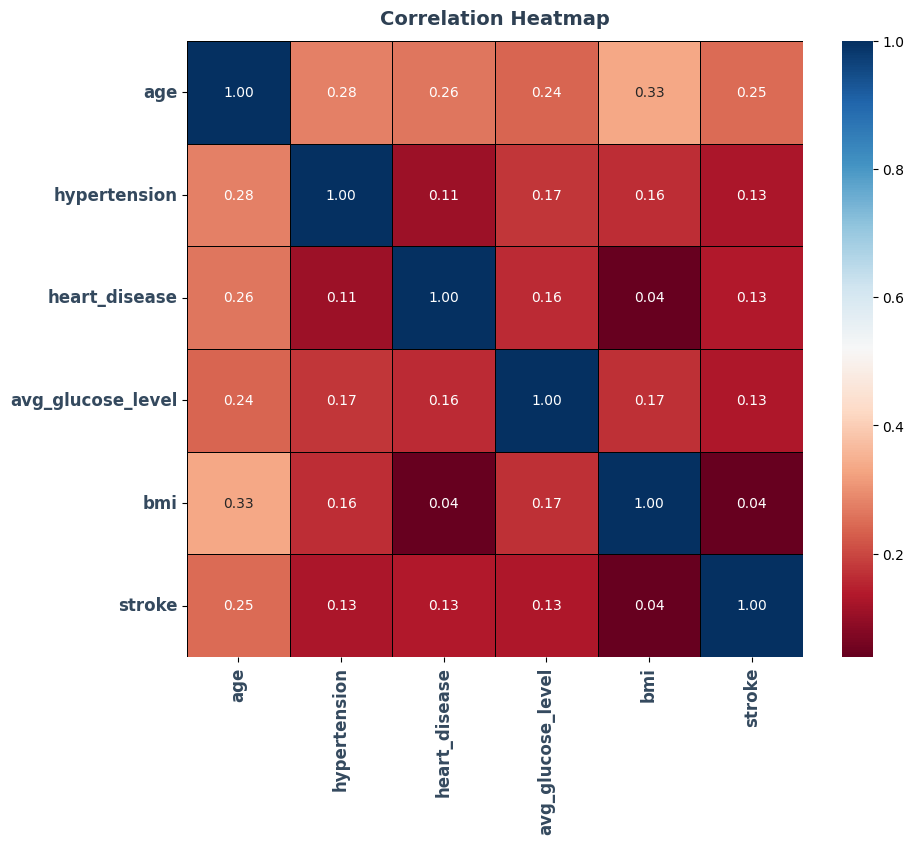

In [167]:
corr_data = df.drop(columns=['id']).select_dtypes(include=['float64', 'int64'])
correlation_matrix = corr_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu', cbar=True, square=True,linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap',fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.xticks(fontsize=12, fontweight='bold', color='#34495E')
plt.yticks(fontsize=12, fontweight='bold', color='#34495E')
plt.show()



> Stroke has a **moderate correlation** with age (**0.25**), indicating that stroke risk increases as people get older. Besides common medical concerns, aging individuals should also be cautious about stroke.

> The correlation matrix shows a **very weak relationship** between BMI and stroke (**0.04)**. While obesity is associated with stroke, BMI alone is not a strong predictor.

> Hypertension (**0.13**), heart disease (**0.13**), and glucose levels (**0.13**) also show **weak correlations** with stroke, suggesting that stroke risk arises from multiple combined factors rather than a single condition.

>Age and BMI show a **weak to moderate correlation** (**0.33**), meaning BMI tends to increase with age, but not in a strictly linear way.

>Age also correlates with **heart disease** (0.26), **glucose levels** (0.24), and**hypertension** (0.28), reinforcing the idea that aging increases the likelihood of these health conditions.





####**5.3 Scatter Plot**

While the correlation matrix provides numerical relationships, it doesn’t capture the full picture—especially for factors with weak correlations. To better visualize patterns, outliers, and variations within each group, a box plot is a useful tool. It helps identify trends that may not be immediately obvious from correlation alone. This allows us to assess whether factors like obesity or high glucose levels still influence stroke risk, even if their correlation values appear low.

>

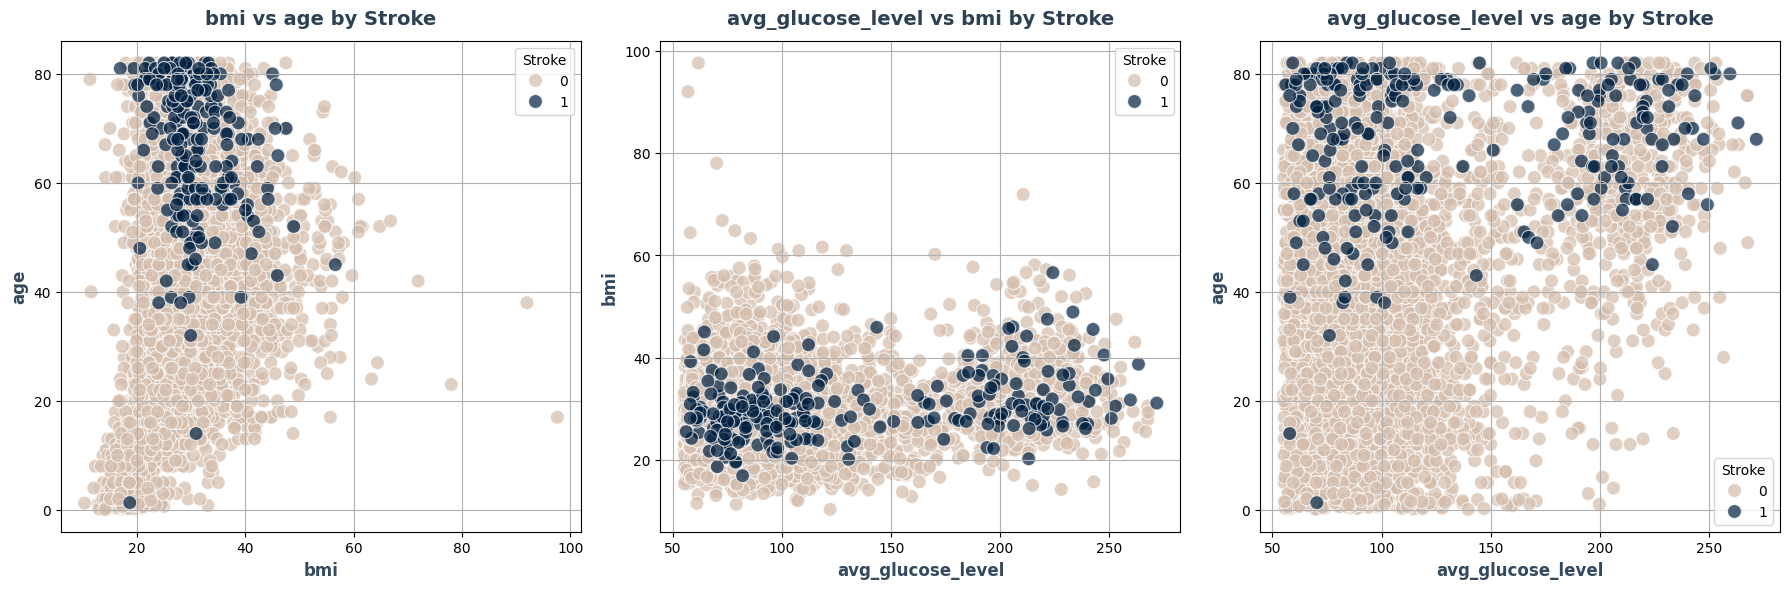

In [139]:
# Define the combinations of variables to plot
var_combinations = [('bmi', 'age'), ('avg_glucose_level', 'bmi'), ('avg_glucose_level', 'age')]
df_sorted = df.sort_values(by="stroke")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
color = {0: '#D4BDAC', 1: '#001F3F'}
for i, (x_var, y_var) in enumerate(var_combinations):
    sns.scatterplot(
        data=df_sorted,
        x=x_var,
        y=y_var,
        hue='stroke',
        palette=color,
        alpha=0.7,
        s=100,
        ax=axes[i])
    axes[i].set_title(f'{x_var} vs {y_var} by Stroke', fontsize=14, fontweight='bold',pad=12, color='#2E4053')
    axes[i].set_xlabel(x_var,fontsize=12, fontweight='bold', color='#34495E')
    axes[i].set_ylabel(y_var, fontsize=12, fontweight='bold', color='#34495E')
    axes[i].grid(True)
    axes[i].legend(title='Stroke', fontsize=10)

plt.tight_layout()
plt.show()




> From the graph, we observe that BMI is primarily concentrated between the range of 20 and 40. Most individuals who experience a stroke tend to be elderly, with the majority of stroke cases occurring in people aged 60 and above. However, there are a few exceptions: one case involves a person under 20 with a low BMI, and another case shows a person under 20 with a BMI around 25. Despite these outliers, the general trend indicates that stroke risk is higher in individuals with BMI in the 20-40 range, particularly as age increases.



> The glucose level distribution appears to be quite even across the data. Both high and low glucose levels are present in individuals who experience a stroke. This further confirms the argument that glucose levels alone may not be the primary factor in stroke risk within this BMI range. Instead, other factors, such as age, may play a more significant role in stroke occurrence.



> Despite variations in glucose levels, the data consistently shows that older individuals—regardless of whether their glucose levels are high or low—are more likely to suffer from a stroke. This reinforces the importance of age as a critical risk factor for stroke, with elderly individuals being at higher risk no matter their glucose level.






####5.4 Categorical Data

Moving into categorical variables, we will look into key aspects of an individual's demographic, such as their smoking habits, living situation, personal status and occupation

In [140]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.3,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,27.6,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [141]:
gender_counts = stroke_data["gender"].value_counts()

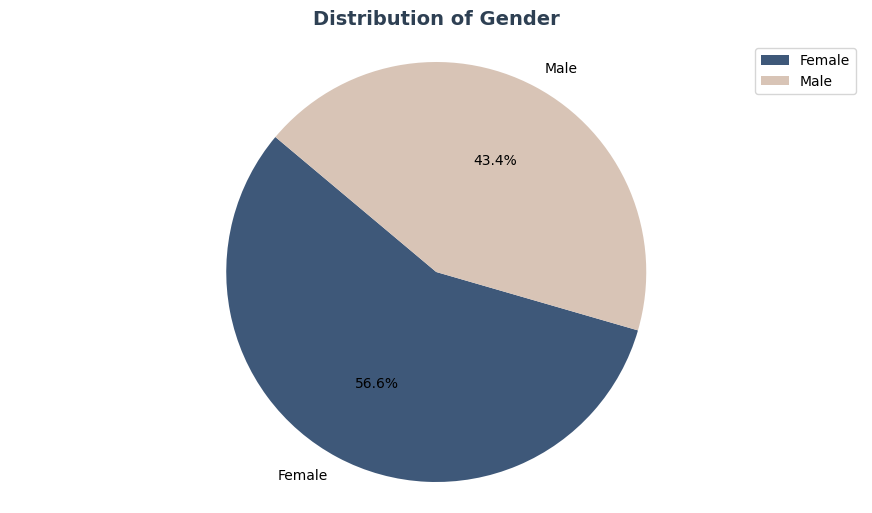

In [142]:
plt.figure(figsize=(11,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',colors=['#3E5879', '#D8C4B6'],startangle=140)
plt.title("Distribution of Gender",fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.legend()
plt.axis('equal')
plt.show()



> From the pie chart, we can see that gender doesn't have a strong impact on stroke risk, as both males and females can experience it. The incidence of stroke is slightly higher in females, with a difference of 13.2% compared to males


In [143]:
marital_status = stroke_data.ever_married.value_counts()

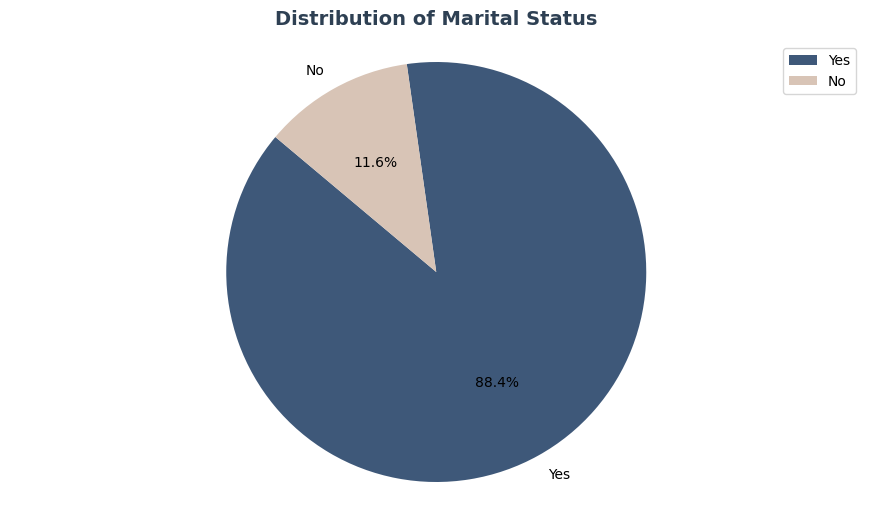

In [144]:
plt.figure(figsize=(11,6))
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%',colors=['#3E5879', '#D8C4B6'],startangle=140)
plt.title("Distribution of Marital Status",fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.legend()
plt.axis('equal')
plt.show()



> This result is somewhat surprising, as 88.4% of married individuals appear to have a higher chance of experiencing a stroke compared to those who are single.



In [168]:
smoke_data = stroke_data.smoking_status.value_counts()

In [170]:
smoke_data

,count
smoking_status,
never smoked,90
formerly smoked,70
Unknown,47
smokes,42


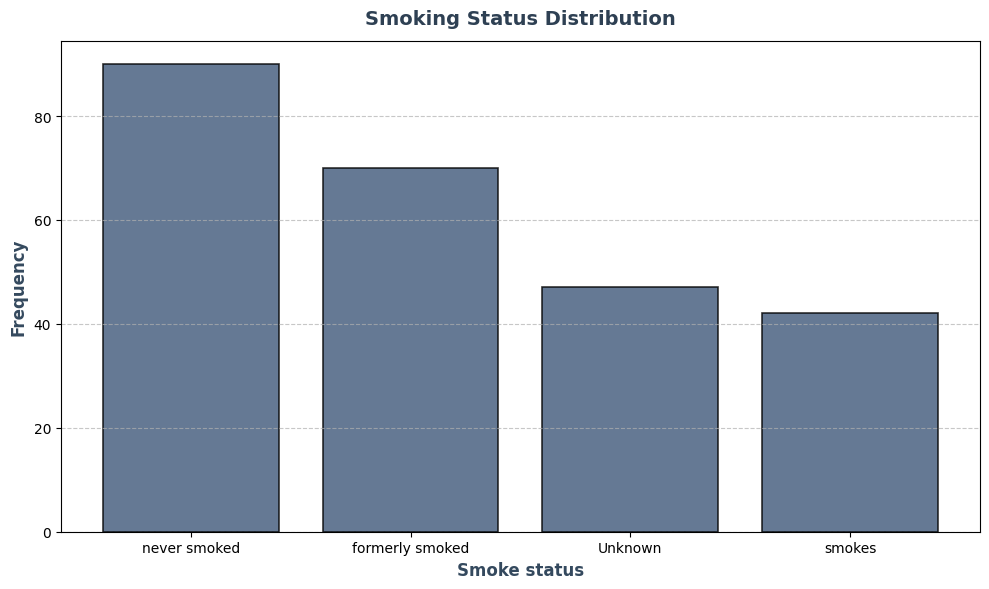

In [169]:
plt.figure(figsize = (10,6))
plt.bar (smoke_data.index,smoke_data,color="#3E5879", edgecolor='black', alpha=0.8, linewidth=1.2)
plt.title("Smoking Status Distribution",fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.xlabel('Smoke status',fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



> It can be observed from the bar chart that smoking, while harmful to the body, isn't the primary cause of stroke. This is evident as 90 people who never smoked and 70 people who previously smoked still experienced a stroke

In [145]:
Residence = stroke_data.Residence_type.value_counts()

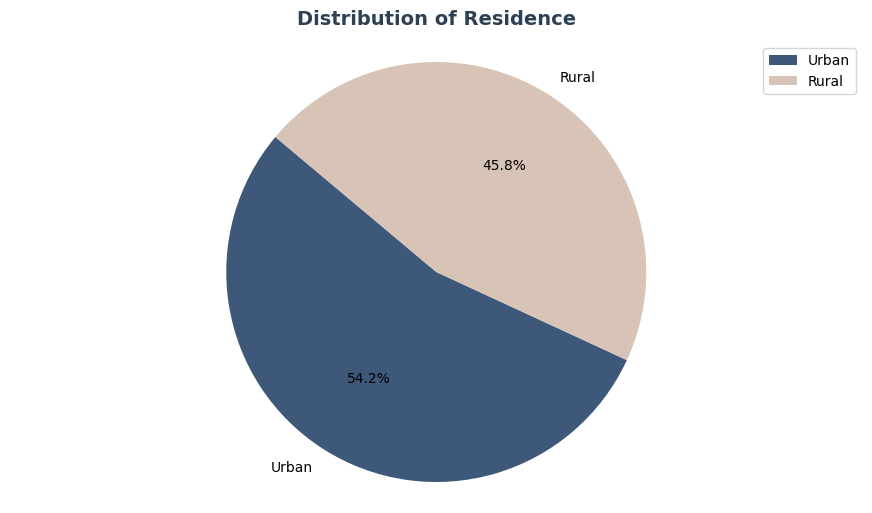

In [146]:
plt.figure(figsize=(11,6))
plt.pie(Residence, labels=Residence.index, autopct='%1.1f%%',colors=['#3E5879', '#D8C4B6'],startangle=140)
plt.title("Distribution of Residence",fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.legend()
plt.axis('equal')
plt.show()



> At this stage, there isn’t a significant difference between living in rural or urban areas, with only an 8% gap. However, individuals residing in urban areas have a slightly higher likelihood of experiencing a stroke.



In [147]:
Occupation = stroke_data.work_type.value_counts()

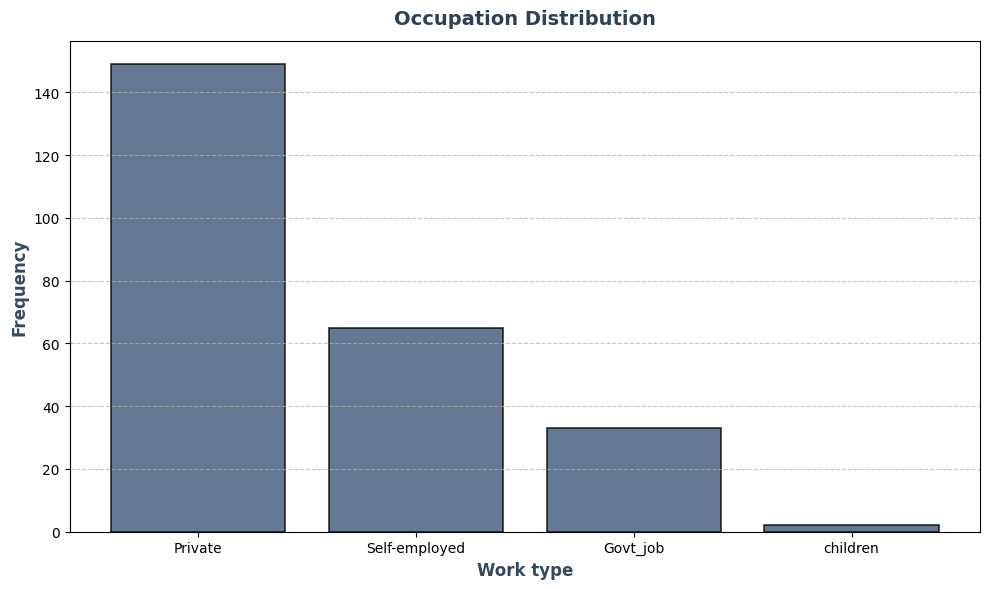

In [148]:
plt.figure(figsize = (10,6))
plt.bar (Occupation.index,Occupation,color="#3E5879", edgecolor='black', alpha=0.8, linewidth=1.2)
plt.title("Occupation Distribution",fontsize=14, fontweight='bold',pad=12, color='#2E4053')
plt.xlabel('Work type',fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


> Employment type is an important consideration. Individuals working in the private sector are tend to have stroke compared to government employees or self-employed individuals. This may be due to higher workload demands, increased stress levels, or other job-related pressures.




Hence, to gain a more comprehensive understanding, a deeper analysis of medical conditions and their correlation with work type will be explored in the next section.

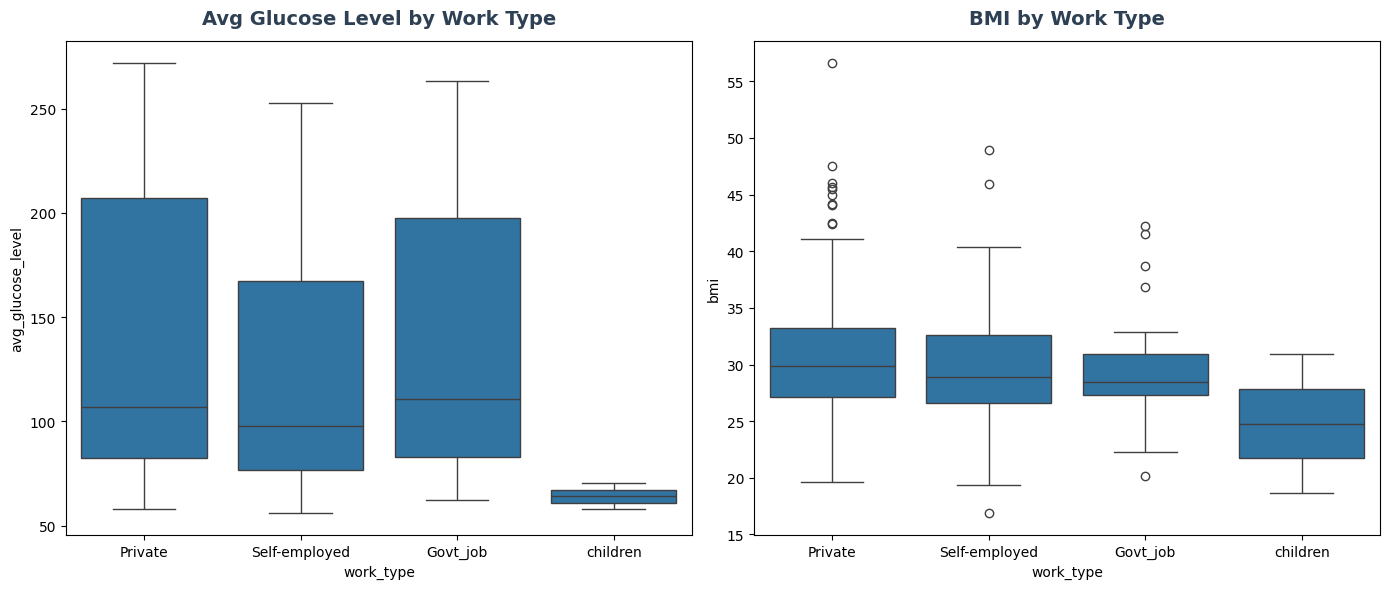

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for avg_glucose_level
sns.boxplot(data=stroke_data, x='work_type', y='avg_glucose_level', ax=axes[0])
axes[0].set_title('Avg Glucose Level by Work Type',fontsize=14, fontweight='bold',pad=12, color='#2E4053')

# Boxplot for BMI
sns.boxplot(data=stroke_data, x='work_type', y='bmi', ax=axes[1])
axes[1].set_title('BMI by Work Type',fontsize=14, fontweight='bold', pad=12, color='#2E4053')

plt.tight_layout()
plt.show()




> There is a high glucose levels in **private job** which indicate potential underlying health risks


> Similarly, the presence of high BMI outliers in **private job**  indicates a potential obesity risk in certain individuals. This aligns with our earlier analysis, which showed that obese and overweight individuals are more likely to experience a stroke







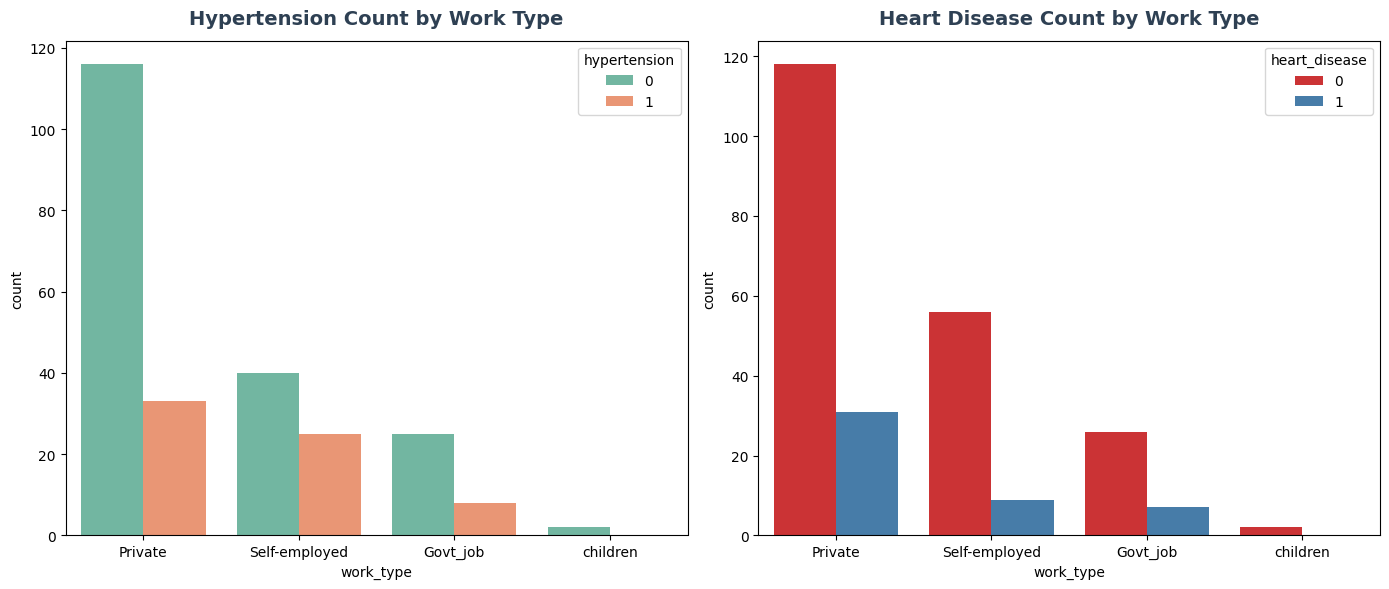

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot for Hypertension
sns.countplot(data=stroke_data, x='work_type', hue='hypertension', ax=axes[0],palette='Set2')
axes[0].set_title('Hypertension Count by Work Type',fontsize=14, fontweight='bold',pad=12, color='#2E4053')

# Countplot for Heart Disease
sns.countplot(data=stroke_data, x='work_type', hue='heart_disease', ax=axes[1],palette='Set1')
axes[1].set_title('Heart Disease Count by Work Type',fontsize=14, fontweight='bold',pad=12, color='#2E4053')

plt.tight_layout()
plt.show()


> People in the private and self-employed sectors seem to experience hypertension more frequently than those in other industries. Similarly, those working in the private sector appear to have a higher risk of developing heart disease


###6. Conclusion
After analyzing the data, we can see several key factors that influence stroke risk:
- Age plays a major role in stroke occurrence. As people get older, their chances of having a stroke increase significantly, especially after the age of 60. This could be due to natural aging effects on blood vessels and overall health.
- Married individuals tend to have a higher risk of stroke compared to single individuals. This could be linked to lifestyle differences, stress, or health habits, though further research would be needed to confirm the exact reasons.
- Being overweight or obese increases the risk of stroke. Interestingly, people working in the private sector have a higher likelihood of being overweight, which may be due to less physical activity and a more sedentary lifestyle. This, in turn, raises their stroke risk.
- Although hypertension and heart disease are often considered the main causes of strokes, the data suggests otherwise. While some people with these conditions do experience strokes, a large number of stroke cases occur in individuals without them
- High or low glucose levels do not show a clear link to stroke. This suggests that while glucose regulation is important for health, it may not be a direct cause of stroke.
- Stroke can happen to anyone, regardless of gender. Both males and females have a similar chance of experiencing a stroke, meaning gender is not a deciding factor.
- While smoking is harmful to overall health, the data does not show a strong connection between smoking and stroke occurrence. Other risk factors may play a more significant role.
- Whether a person lives in an urban or rural area does not seem to affect their chances of having a stroke. Stroke risk appears to be more influenced by personal health and lifestyle rather than location.


